### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###

# The Traveling Software Engineer #

#### Rayne Wolf (rmwolf2@wisc.edu), Bella Wu (zwu363@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [Mathematical Model 1](#2.A.-Model-1:-Find-the-optimal-flight-to-visit-one-city)
    2. [Mathematical Model 2](#2.B.-Model-2:-Find-the-optimal-flights-to-visit-intermediate-cities)
    3. [Mathematical Model 3](#2.C.-Model-3:-Find-the-optimal-flights-to-visit-all-cities)
1. [Solution](#3.-Solution)
    1. [Model 1](#A.-Model-1)
    2. 
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Epic, a healthcare software company located in Fitchburg, Wisconsin, would like to have one of its software developers visit their clients in major hospitals throughout the United States to discuss possible improvements and troubleshoot errors. Our group has been hired by Epic to create a model that would determine the options of travel along a predetermined network of possible flight paths to various cities across the US. This problem is modeled after the Traveling Salesman Problem; however, we renamed it to the Traveling Software Engineer Problem!

The Traveling Salesman Problem was first mathematically formulated in the 1930s by Merrill M. Flood. It was used to solve a school bus routing problem: minimizing the distance of the bus route while ensuring that all students were picked up (Flood, 1935). Our problem takes a similar approach, minimizing flight time or travel cost while making a certain number of stops to various cities across the country. 

Our model has two approaches depending on what Epic would like to optimize. The first is minimizing travel costs, these include flight costs and the hotel cost that corresponds to staying in a particular city. The second is minimizing the travel time, this includes the time spent flying from one city to the next. Both approaches (e.g. objective functions) will be investigated in each different formulation of the problem. The network of flights considered can be seen in Figure 1 and Figure 2. Figure 1 depicts the intermediate flight paths between cities, and Figure 2 depicts the departing and returning flights from Madison for each city.

The following data was collected for this problem: flight costs, hotel costs, and flight times. Flight costs and hotel costs were collected using Google, and the cheapest airline and hotel chain was selected. Flight and hotel costs were collected for June 1st  – 7th 2022. It is assumed that the costs vary only slightly day to day within this narrow timeframe. Flight times were collected using https://www.travelmath.com/flying-time/. It is assumed that flights cannot be delayed or canceled. 

We have modeled 3 separate scenarios that Epic might be interested in. Each scenario will consider the two problems mentioned above, either minimizing travel costs or flight time. The first model (Model 1) considers if Epic wanted to send their software engineer from Madison to one US city, stay overnight in that city, and then fly back to Madison. The second model (Model 2) considers if Epic wanted to send their software engineer from Madison to one city in each region (North, East, South, and West), stay overnight in each of the four selected cities, and then fly back to Madison. The final model (Model 3) considers if Epic wanted to send their software engineer from Madison to each US city, staying overnight in each city, and then fly back to Madison. Each model will choose the optimal flight path to minimize travel cost or flight time. 

The remainder of the report will be in the following format: the mathematical model of each optimization problem (Models 1, 2, and 3), the solution which will display the code that solves each problem using Julia, the results of solving each model, the conclusion of our project results, and author contributions. 

Citations

Informs. (n.d.). Flood, Merrill M. INFORMS. Retrieved April 19, 2022, from https://www.informs.org/Explore/History-of-O.R.-Excellence/Biographical-Profiles/Flood-Merrill-M 


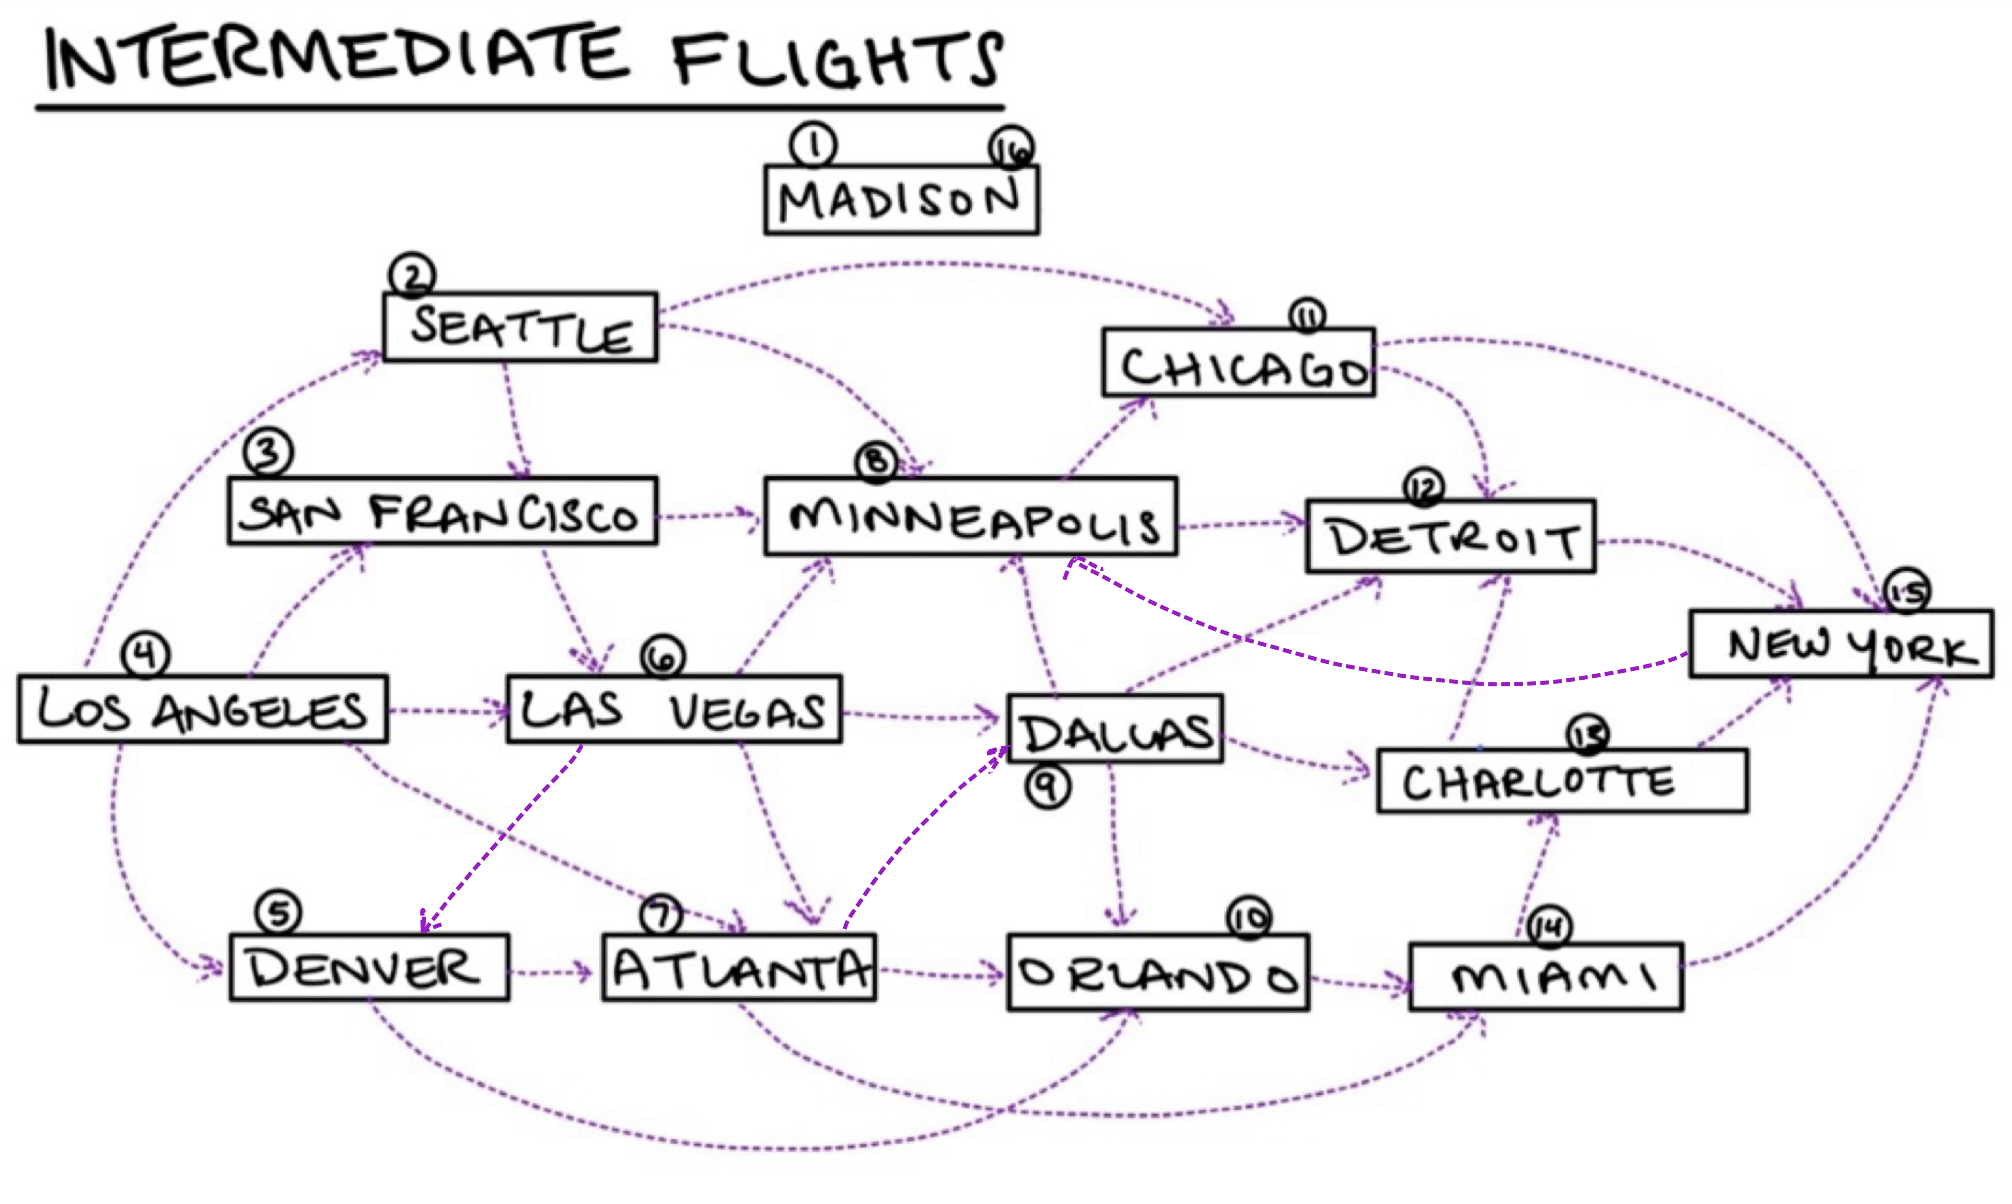
Figure 1: Intermediate Flight Paths Between Cities

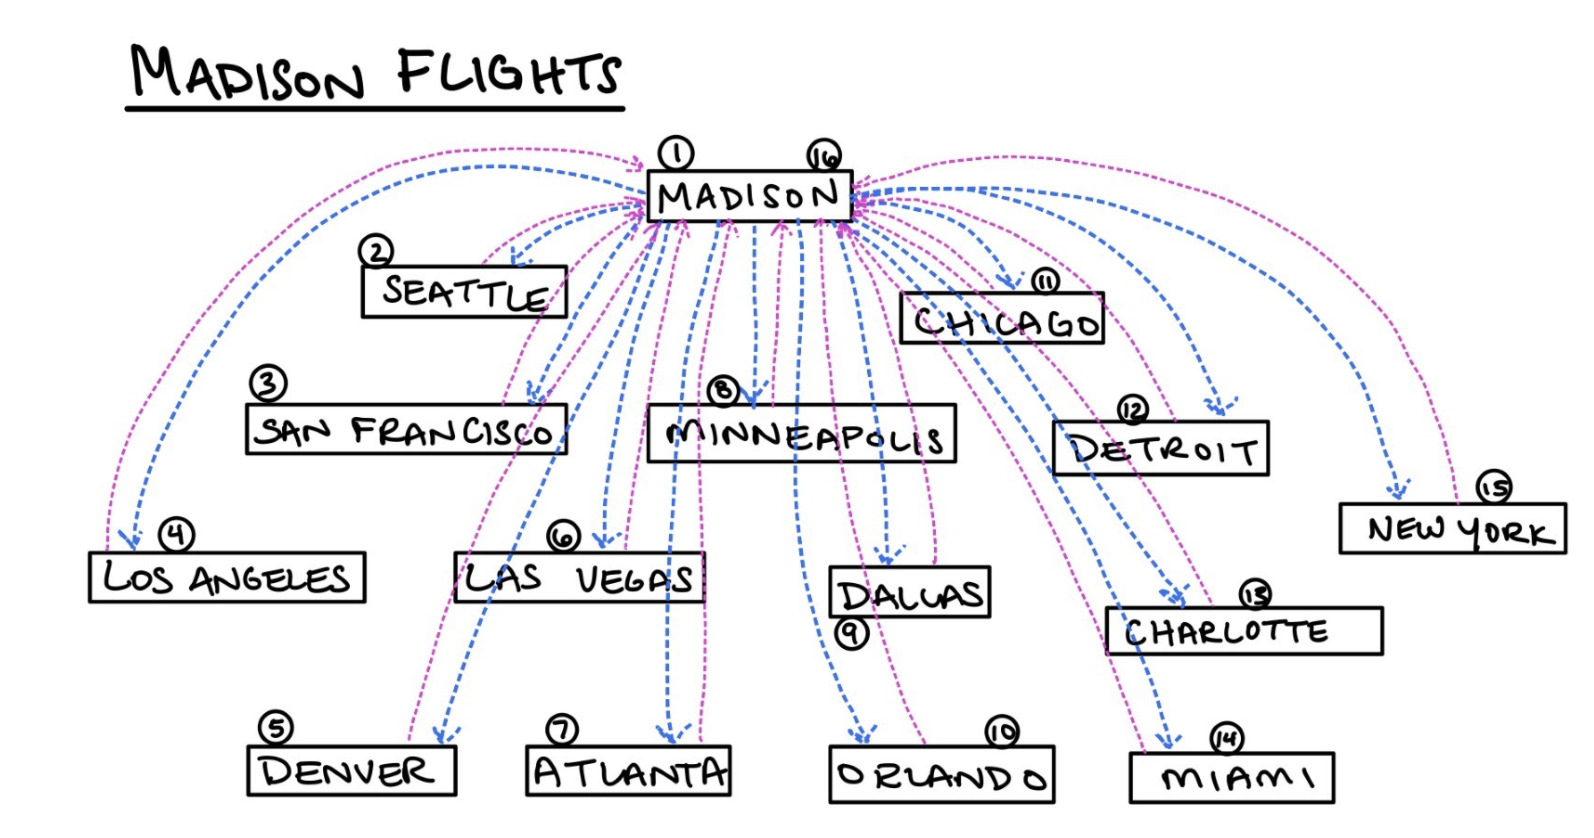
Figure 2: Flight Paths between each city and Madison 

## 2. Mathematical model ##
### 2.A. Model 1: Find the optimal flight to visit one city

This model is interested in finding the optimal flights from Madison to one of 14 different cities and back to Madison. Two different models are constructed with two different objectives, holding model constraints unchanged. The first model is going to optimize the total cost of flights while the second model will optimize the total time of flights.

$\textbf{Parameters and Assumptions:}$

Assume that the salesman travels from Madison to city $z \in N$ where $N$ is defined as below. The salesman is allowed to transfer to minimize either the total cost or the total time. 

Sets used in the model is defined as below:
$$A: \text{the set of flight paths}$$
$$N: \text{the set of cities}$$

The total number of nodes is 16 because city Madison is both the source node and the sink node of the model:
$$n = 16$$

The flow balance on each node is defined as below:
$$b_i= \begin{cases} 
      1 & i = 1 \\
      -1 & i = 16 \\
      0 &  \text{otherwise}
   \end{cases} \  \forall i=1\dots n
$$

For each flight, we define the flying time as below:
$$t_{ij} \ \forall i=1\dots n,\forall j=1\dots n, (i, j) \in A$$
For each flight, we define the ticket price as below:
$$c_{ij} \ \forall i=1\dots n,\forall j=1\dots n, (i, j) \in A$$

$\textbf{Decision Variables:}$

The decision variables are binary decision variables in terms of i and j, in which i represents the origin and j represents the destination. In this case, the salesman starts in Madison, goes to city $z$ and returns back to Madison.

$$x_{ij}= \begin{cases} 
      1 & \text{if the salesman takes the flight from city i to city j} \\
      0 & \text{otherwise}
   \end{cases} $$
$$\forall i=1\dots n,\forall j=1\dots n, (i, j) \in A$$

$\textbf{Constraints:}$

This is the flow balance constraint:
$$\sum_{j=1}^n x_{ij} - \sum_{j=1}^n x_{ji} = b_i \qquad \forall i=1\dots n$$

To ensure the salesman flies to city $z$, the flow into and out of node $z$ should be 1:
$$\sum_{j=1}^n x_{zj} = 1 $$
$$\sum_{j=1}^n x_{jz} = 1 $$


$\textbf{Objective 1:}$

To minimize the total cost of flights:
$$ min \text{ } \sum_{j=1}^n\sum_{i=1}^n c_{ij}x_{ij} \qquad (i, j) \in A$$

$\textbf{Objective 2:}$

To minimize the total time of flights:
$$ min \text{ } \sum_{j=1}^n\sum_{i=1}^n t_{ij}x_{ij} \qquad (i, j) \in A$$

### 2.B. Model 2: Find the optimal flights to visit intermediate cities

This model aims to find the optimal path starting from Madison, visiting at least one city located in the Midwest, South, West, and East, and returning back to Madison. Similar to the previous model, our group is going to optimize the total flying time and cost in two separate objectives. In terms of total cost of the travel, hotel price is also taken into consideration. 

$\textbf{Parameters and Assumptions:}$

Our group assumes that when visiting each of the cities in Midwest, South, West, and East, the salesman stays in the hotel for exactly one night, consistent with the reality. 

Sets $A$, $N$ and vector $n$, $b$, $t_{ij}$, $c_{ij}$ are defined in the same way as the previous model. 

Assume that the salesman has a place to live in Madison, we could set the hotel price in Madison as 0 for simplicity. For other cities, we define the hotel price as below:
$$h_i \ i \in N$$

$\textbf{Decision Variables:}$

We define binary decision variables to keep track of the path:
$$x_{ij}= \begin{cases} 
      1 & \text{if the salesman takes the flight from city i to city j} \\
      0 & \text{otherwise}
   \end{cases} $$
$$\forall i=1\dots n,\forall j=1\dots n, (i, j) \in A$$

Here is the decision variable to denote whether the salesman has visited the city:
$$H_{i}= \begin{cases} 
      1 & \text{if the salesman visits the city i} \\
      0 & \text{otherwise}
   \end{cases} $$
$$\forall i=1\dots n$$

$\textbf{Constraints:}$

This is the flow balance constraint:
$$\sum_{j=1}^n x_{ij} - \sum_{j=1}^n x_{ji} = b_i \qquad \forall i=1\dots n$$

If the salesman has visited city $i$, the flow out of the node $i$ should be 1:
$$\sum_{j=1}^n x_{ij} = H_i$$

The salesman visits at least one city in the north:
$$H_2+H_8+H_4+H_{12} \ge 1$$
The salesman visits at least one city in the east:
$$H_7+H_{13}+H_{15} \ge 1$$
The salesman visits at least one city in the south:
$$H_9+H_{10}+H_{14} \ge 1$$
The salesman visits at least one city in the west:
$$H_3+H_4+H_5+H_6 \ge 1$$

$\textbf{Objective 1:}$

To minimize the total cost of flights including the hotel expenses:
$$ min \text{ } \sum_{j=1}^n\sum_{i=1}^n c_{ij}x_{ij} + \sum_{k=1}^n h_kH_k \qquad (i, j) \in A$$

$\textbf{Objective 2:}$

To minimize the total time of flights:
$$ min \text{ } \sum_{j=1}^n\sum_{i=1}^n t_{ij}x_{ij} \qquad (i, j) \in A$$

### 2.C. Model 3: Find the optimal flights to visit all cities
$\textbf{Parameters and Assumptions:}$

The salesman starts from madison, visits all cities exactly once and returns back to Madison.

There is no source node or sink node in the graph. Madison (15) not (1) and (16)

Update the following:
$A', N'$
$n' = 15$

$\textbf{Decision Variables:}$

We define binary decision variables to keep track of the path:
$$x_{ij}= \begin{cases} 
      1 & \text{if the salesman takes the flight from city i to city j} \\
      0 & \text{otherwise}
   \end{cases} $$
$$\forall i=1\dots n',\forall j=1\dots n', (i, j) \in A'$$

According to Miller–Tucker–Zemlin formulation, we define a dummy variable to keep track of the order in which the cities are visited:
$$z_i \ free \ for \ i=1,..,n$$

$\textbf{Constraints:}$

There must be a flow of 1 into every destination:
$$\sum_{i=1}^n x_{i,j}= 1 \text{ }  \qquad \forall j=1\dots n, (i, j) \in A$$

There must be a flow of 1 out of every destination:
$$\sum_{j=1}^n x_{i,j}= 1 \text{ }  \qquad \forall i=1\dots n, (i, j) \in A$$

Since the salesman visits 14 different cities and returns back to Madison, he should take 15 different flights in total:
$$\sum_{j=1}^n\sum_{i=1}^n x_{ij} = 15 \qquad (i, j) \in A$$

There cannot be any subtours:
$$z_i - z_j + nx_{ij} \le n - 1 \qquad \forall i=1\dots n, \forall j=1\dots n, (i, j) \in A$$

$\textbf{Objective:}$

$$ min \text{ } \sum_{j=1}^n\sum_{i=1}^n c_{ij}x_{ij} \qquad (i, j) \in A$$

## 3. Solution ##

Defining Packages

In [21]:
using JuMP, Cbc, NamedArrays

Setting up the Network based on Figures 1 & 2

In [22]:
#Number of cities
nodes = 1:16

#Set of flight paths for each city
arcs = [(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),
        (1,11),(1,12),(1,13),(1,14),(1,15),(2,16),(3,16),(4,16),(5,16),(6,16),
        (7,16),(8,16),(9,16),(10,16),(11,16),(12,16),(13,16),(14,16),(15,16),(4,2),
        (4,3),(2,3),(4,5),(4,6),(4,7),(3,6),(5,10),(5,7),(6,7),(3,8),
        (2,8),(2,11),(8,11),(6,8),(6,9),(7,10),(7,14),(10,14),(9,10),(9,8),
        (8,12),(9,12),(9,13),(13,12),(11,12),(12,15),(11,15),(13,15),(14,13),(14,15),
        (6, 5),(7, 9), (15, 8)]

#Flow of traveler
b = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1]

#Assign cities to numeric values:
# Madison = 1, 16
# Seattle = 2
# San Francisco = 3
# Los Angeles = 4
# Denver = 5
# Las Vegas = 6
# Atlanta = 7
# Minneapolis = 8
# Dallas = 9
# Orlando = 10
# Chicago = 11
# Detroit = 12
# Charlotte = 13
# Miami = 14
# New York = 15
intcities = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

#Flight costs
cost = [181,242,262,168,218,159,129,166,198,184,
                            137,166,194,149,132,243,226,167,216,159,
                            129,166,198,184,129,165,206,149,99,44,
                            69,69,44,134,89,139,99,110,95,144,
                            108,92,78,88,88,46,69,119,94,149,
                            118,163,107,109,89,79,107,131,62, 
                            250, 223, 216]
flightcost = Dict(zip(arcs,cost))

#Flight Time
time = [225,242,231,124,204,98,47,123,144,30,
                            55,115,186,121,225,242,231,124,204,98,
                            47,123,144,30,55,115,186,121,134,57,
                            122,112,46,226,66,186,147,204,205,165,
                            221,66,157,134,60,88,42,124,116,74,
                            132,120,62,45,73,96,94,101,147,
                            114, 138, 178]
flighttime = Dict(zip(arcs,time))

u = Dict(zip(arcs, ones(length(arcs))))

#Hotel costs for staying in a city
hotelcost = [0,146,83,215,92,127,111,106,98,77,175,
             100,109,104,102,0]

#List of options that satisfy the intermediate flight requirements

#North Cities [1]: Seattle, Minneapolis, Chicago, Detroit
#East Cities [2]: Atlanta, Charlotte, New York
#South Cities [3]: Dallas, Orlando, Miami
#West Cities [3]: San Francisco, Los Angeles, Denver, Las Vegas

coverage = Dict()
coverage[1] = [2, 8, 11, 12]
coverage[2] = [7, 13, 15]
coverage[3] = [9, 10, 14]
coverage[4] = [3, 4, 5, 6]

#Number of intermediate city groups (North, East, South, West)
Intcity = 1:length(coverage)

1:4

### A. Model 1

In [23]:
rst11_cost = [] #save the minimum cost of each travel
rst11_time = [] #save total time of each travel
rst11_path = [] #save the minimum-cost-path of each travel

for z in 2:15 #iterate through 14 destination cities
    m11 = Model()
    @variable(m11, 0<= x[a in arcs] <= u[a]) #0<=x<=1
    @objective(m11, Min, sum(flightcost[a]*x[a] for a in arcs)) #minimize cost
    @constraint(m11, flowbalance[i in nodes], 
        sum(x[(i,j)] for j in nodes if (i,j) in arcs) - 
        sum(x[(j,i)] for j in nodes if (j,i) in arcs) 
        == b[i])
    @constraint(m11, sum(x[(z,j)] for j in nodes if (z,j) in arcs) == 1) #flight from destination to madison
    @constraint(m11, sum(x[(j,z)] for j in nodes if (j,z) in arcs) == 1) #flight to the destination city
    set_optimizer(m11, Cbc.Optimizer)
    set_silent(m11)
    optimize!(m11)
    
    temp_path = [] #path to current city
    temp_time = 0  #flight time to current city
    for a in arcs
        if round(value(x[a]),digits=1) == 1
            push!(temp_path, a)
            temp_time += flighttime[a]
        end
    end
    push!(rst11_path, temp_path)
    push!(rst11_time, temp_time)
    push!(rst11_cost, round(objective_value(m11), digits = 1))
end

Presolve 7 (-11) rows, 19 (-43) columns and 38 (-92) elements
0  Obj 427 Primal inf 1.999998 (2) Dual inf 354 (3)
2  Obj 313
Optimal - objective value 313
After Postsolve, objective 313, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 313 - 2 iterations time 0.002, Presolve 0.00
Presolve 9 (-9) rows, 24 (-38) columns and 48 (-82) elements
0  Obj 419 Primal inf 1.999998 (2) Dual inf 81.999999 (1)
2  Obj 466
Optimal - objective value 466
After Postsolve, objective 466, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 466 - 2 iterations time 0.002, Presolve 0.00
Presolve 10 (-8) rows, 29 (-33) columns and 58 (-73) elements
0  Obj 262 Primal inf 1.999998 (2)
2  Obj 488
Optimal - objective value 488
After Postsolve, objective 488, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 488 - 2 iterations time 0.002, Presolve 0.00
Presolve 8 (-10) rows, 21 (-41) columns and 42 (-88) elements
0  Obj 490 Primal inf 1.999998 (2) Dual inf 332 (2)
2  Obj 335
Optimal 

In [24]:
rst12_cost = [] #save the minimum cost of each travel
rst12_time = [] #save total time of each travel
rst12_path = [] #save the minimum-cost-path of each travel

for z in 2:15 #iterate through 14 destination cities
    m12 = Model()
    @variable(m12, 0<= x[a in arcs] <= u[a]) #0<=x<=1
    @objective(m12, Min, sum(flighttime[a]*x[a] for a in arcs)) #minimize time
    @constraint(m12, flowbalance[i in nodes], 
        sum(x[(i,j)] for j in nodes if (i,j) in arcs) - 
        sum(x[(j,i)] for j in nodes if (j,i) in arcs) 
        == b[i])
    @constraint(m12, sum(x[(z,j)] for j in nodes if (z,j) in arcs) == 1) #flight from destination to madison
    @constraint(m12, sum(x[(j,z)] for j in nodes if (j,z) in arcs) == 1) #flight to the destination city
    set_optimizer(m12, Cbc.Optimizer)
    set_silent(m12)
    optimize!(m12)
    
    temp_path = [] #path to current city
    temp_cost = 0  #flight time to current city
    for a in arcs
        if round(value(x[a]),digits=1) == 1
            push!(temp_path, a)
            temp_cost += flightcost[a]
        end
    end
    push!(rst12_path, temp_path)
    push!(rst12_cost, temp_cost)
    push!(rst12_time, round(objective_value(m12), digits = 1))
end

Presolve 7 (-11) rows, 19 (-43) columns and 38 (-92) elements
0  Obj 547 Primal inf 1.999998 (2) Dual inf 355 (3)
2  Obj 437
Optimal - objective value 437
After Postsolve, objective 437, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 437 - 2 iterations time 0.002, Presolve 0.00
Presolve 9 (-9) rows, 24 (-38) columns and 48 (-82) elements
0  Obj 442 Primal inf 1.999998 (2)
3  Obj 484
Optimal - objective value 484
After Postsolve, objective 484, infeasibilities - dual 59 (1), primal 0 (0)
Presolved model was optimal, full model needs cleaning up
0  Obj 484 Dual inf 59 (1)
1  Obj 484
Optimal - objective value 484
Optimal objective 484 - 4 iterations time 0.002, Presolve 0.00
Presolve 10 (-8) rows, 29 (-33) columns and 58 (-73) elements
0  Obj 231 Primal inf 1.999998 (2)
3  Obj 462
Optimal - objective value 462
After Postsolve, objective 462, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 462 - 3 iterations time 0.002, Presolve 0.00
Presolve 8 (-10) rows, 21 (-4

## Model 2
Optimization Model Minimizing Flight Costs

In [25]:
#Defining model
m_costs = Model()

#If we vist the city using that specified flight path
@variable(m_costs, 0<= x[a in arcs] <= u[a])

#If we choose to visit that intermediate city, then we have to pay the corresponding hotel cost
@variable(m_costs, H[intcities], Bin)

#Minimize Flight Cost
@objective(m_costs, Min, sum(flightcost[a]*x[a] for a in arcs) + sum(hotelcost[i]*H[i] for i in intcities))

#Flow balance
@constraint(m_costs, flowbalance[i in nodes],
    sum(x[(i,j)] for j in nodes if (i,j) in arcs) - 
    sum(x[(j,i)] for j in nodes if (j,i) in arcs) 
    == b[i])

#Constraint for which cities to visit
@constraint(m_costs, visitcity[i in intcities], sum(x[(i,j)] for j in nodes if (i,j) in arcs) == H[i])

#Constraint for visiting N/E/S/W groups of intermediate cities Intcity=1:4
@constraint(m_costs, cover[i in Intcity], sum(H[j] for j in coverage[i]) >=1)

set_optimizer(m_costs, Cbc.Optimizer)
set_silent(m_costs)
optimize!(m_costs)

rst21_tot_cost = round(objective_value(m_costs),digits=1)
rst21_path = []
Flight_Costs = []
Flight_Times = []
Hotel_Costs = []

for a in arcs 
    if round(value(x[a]),digits=1) == 1
        push!(Flight_Costs, flightcost[a])
        push!(Flight_Times, flighttime[a])
        push!(rst21_path, a)
    end
end

for i in intcities
    if round(value(H[i]), digits=1) == 1
        push!(Hotel_Costs, hotelcost[i])
    end
end

rst21_cost = sum(Flight_Costs)
rst21_time = sum(Flight_Times)
rst21_hotel = sum(Hotel_Costs)

427

Model Results

Optimization Model Minimizing Flight Time

In [26]:
#Defining model
m_times = Model()

#If we vist the city using that specified flight path
@variable(m_times, 0<= x[a in arcs] <= u[a])

#If we choose to visit that intermediate city, then we have to pay the corresponding hotel cost
@variable(m_times, H[intcities], Bin)

#Minimize Flight Time
@objective(m_times, Min, sum(flighttime[a]*x[a] for a in arcs))

#Flow balance
@constraint(m_times, flowbalance[i in nodes],
    sum(x[(i,j)] for j in nodes if (i,j) in arcs) - 
    sum(x[(j,i)] for j in nodes if (j,i) in arcs) 
    == b[i])

#Constraint for which cities to visit
@constraint(m_times, visitcity[i in intcities], sum(x[(i,j)] for j in nodes if (i,j) in arcs) == H[i])

#Constraint for visiting N/E/S/W groups of intermediate cities
@constraint(m_times, cover[i in Intcity], sum(H[j] for j in coverage[i]) >=1)

set_optimizer(m_times, Cbc.Optimizer)
set_silent(m_times)
optimize!(m_times)

rst22_time = round(objective_value(m_times),digits=1)
rst22_tot_cost = 0
rst22_cost = []
rst22_path = []
Flight_Costs = []
Hotel_Costs = []

for a in arcs 
    if round(value(x[a]),digits=1) == 1
        push!(Flight_Costs, flightcost[a])
        push!(rst22_path, a)
    end
end

for i in intcities
    if round(value(H[i]), digits=1) == 1
        push!(Hotel_Costs, hotelcost[i])
    end
end

rst22_cost = sum(Flight_Costs)
rst22_hotel = sum(Hotel_Costs)
rst22_tot_cost = rst22_cost+rst22_hotel

1225

## Model 3

In [27]:
#Number of cities
nodes = 1:15

#Set of flight paths for each city
arcs = [(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),
        (1,11),(1,12),(1,13),(1,14),(1,15),(2,1),(3,1),(4,1),(5,1),(6,1),
        (7,1),(8,1),(9,1),(10,1),(11,1),(12,1),(13,1),(14,1),(15,1),(4,2),
        (4,3),(2,3),(4,5),(4,6),(4,7),(3,6),(5,10),(5,7),(6,7),(3,8),
        (2,8),(2,11),(8,11),(6,8),(6,9),(7,10),(7,14),(10,14),(9,10),(9,8),
        (8,12),(9,12),(9,13),(13,12),(11,12),(12,15),(11,15),(13,15),(14,13),(14,15),
        (6, 5),(7, 9), (15, 8)]

flightcost = Dict(zip(arcs, cost))
flighttime = Dict(zip(arcs, time))
u = Dict(zip(arcs, ones(length(arcs))))

rst3_time = []
rst3_path = []
m3 = Model()
@variable(m3, 0<= x[a in arcs] <= u[a], Bin) #set as a binomial variable
@objective(m3, Min, sum(flightcost[a]*x[a] for a in arcs))
for i in nodes
    @constraint(m3, sum(x[(i,j)] for j in nodes if (i,j) in arcs) == 1)
    @constraint(m3, sum(x[(j,i)] for j in nodes if (j,i) in arcs) == 1)
end
#@constraint(m3, sum(x[(1,j)] for j in nodes if (1,j) in arcs) == 1)
#@constraint(m3, sum(x[(j,16)] for j in nodes if (j,16) in arcs) == 1)
# MTZ variables and constraints https://en.wikipedia.org/wiki/Travelling_salesman_problem#As_a_graph_problem
#@constraint(m3, sum(x) == 15)
@variable(m3, z[nodes])
for ui in 1:15
    for uj in 2:15
        if (ui, uj) in arcs
            #@constraint(m3, z[ui] + x[(ui, uj)] <= z[uj]+ (15 - 1) * (1 - x[(ui, uj)]))
            @constraint(m3, z[ui] - z[uj]+15*x[(ui, uj)] <=  (15 - 1))
        end
    end
end
set_optimizer(m3, Cbc.Optimizer)
set_silent(m3)
optimize!(m3)
for a in arcs
    if value(x[a]) >= 1
        push!(rst3_path, a)
        push!(rst3_time, flighttime[a])
    end
end
rst3_cost = round(objective_value(m3), digits = 1)
rst3_time = sum(rst3_time)
println(rst3_path)
println(rst3_cost)
println(rst3_time)

Any[(1, 4), (12, 1), (4, 2), (2, 3), (3, 6), (5, 7), (8, 11), (10, 14), (9, 10), (11, 12), (13, 15), (14, 13), (6, 5), (7, 9), (15, 8)]
2063.0
1657


## 4. Results and discussion ##
## TO DO

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |

### 4.A. Feel free to add subsections

#### 4.A.a. or subsubsections

In [33]:
#m11
for i in 2:15
    println("city: ", i, ",cost: ", rst11_cost[i-1], ",time: ", rst11_time[i-1], ",path: ", rst11_path[i-1])
end

#m12
println(rst12_cost)
println(rst12_time)
println(rst12_path)

#m_costs
println(rst21_tot_cost)
println(rst21_path)
println(rst21_cost)
println(rst21_time)
println(rst21_hotel)

#m_times
println(rst22_tot_cost)
println(rst22_path)
println(rst22_cost)
println(rst22_time)
println(rst22_hotel)
#m3
println(rst3_path)
println(rst3_cost)
println(rst3_time)

city: 2,cost: 313.0,time: 450,path: Any[(1, 2), (2, 16)]
city: 3,cost: 466.0,time: 494,path: Any[(1, 3), (8, 16), (3, 8)]
city: 4,cost: 488.0,time: 462,path: Any[(1, 4), (4, 16)]
city: 5,cost: 335.0,time: 248,path: Any[(1, 5), (5, 16)]
city: 6,cost: 425.0,time: 408,path: Any[(1, 6), (8, 16), (6, 8)]
city: 7,cost: 318.0,time: 196,path: Any[(1, 7), (7, 16)]
city: 8,cost: 258.0,time: 94,path: Any[(1, 8), (8, 16)]
city: 9,cost: 332.0,time: 246,path: Any[(1, 9), (9, 16)]
city: 10,cost: 396.0,time: 288,path: Any[(1, 10), (10, 16)]
city: 11,cost: 368.0,time: 60,path: Any[(1, 11), (11, 16)]
city: 12,cost: 266.0,time: 110,path: Any[(1, 12), (12, 16)]
city: 13,cost: 331.0,time: 230,path: Any[(1, 13), (13, 16)]
city: 14,cost: 400.0,time: 372,path: Any[(1, 14), (14, 16)]
city: 15,cost: 298.0,time: 242,path: Any[(1, 15), (15, 16)]
Any[454, 485, 488, 335, 434, 318, 258, 332, 396, 368, 266, 331, 400, 298]
Any[437.0, 484.0, 462.0, 248.0, 408.0, 196.0, 94.0, 246.0, 288.0, 60.0, 110.0, 230.0, 372.0, 242

### You can add change the format of sections 2, 3 and 4 to accomodate multiple versions of your model, sensitivity analysis etc. 

## 5. Conclusion  TO DO ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

## 6. Author Contributions TO DO

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

#### 1. Modelling  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

  
#### 2. Analysis  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 3. Data Gathering  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 4. Software Implementation  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 5. Report writing and poster presentation   
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  